## Dataset Description

A backorder is the order which could not be fulfilled by the company. Due to high demand of a product, the company was not able to keep up with the delivery of the order. The backordering can lead to upsetting customer as they couldn't get what they ordered and the loyalty will decrease.
Also, company cannot overstock every product in their inventory to avoid such situation.
There has to be a way for the company to know for which products they can face this problem. 

In order to overcome this problem,the company has shared a data file with different input features for each product and it hopes to find a pattern inside this data which can give them some insight.

### Features:
<table>
<tr>
<th>Feature Name</th>
<th>Description</th>
</tr>

<tr>
    <td>sku</td>
    <td>Random ID for the product</td>
</tr>
<tr>
    <td>national_inv</td>
    <td>Current inventory level for the part</td>
</tr>
<tr>
    <td>lead_time</td>
    <td>Transit time for product (if available)</td>
</tr>
<tr>
    <td>in_transit_qty</td>
    <td>Amount of product in transit from source</td>
</tr>
<tr>
    <td>forecast_3_month</td>
    <td>Forecast sales for the next 3 months</td>
</tr>
<tr>
    <td>forecast_6_month</td>
    <td>Forecast sales for the next 6 months</td>
</tr>
<tr>
    <td>forecast_9_month</td>
    <td>Forecast sales for the next 9 months</td>
</tr>
<tr>
    <td>sales_1_month</td>
    <td>Sales quantity for the prior 1 month time period</td>
</tr>
<tr>
    <td>sales_3_month</td>
    <td>Sales quantity for the prior 3 month time period</td>
</tr>
<tr>
    <td>sales_6_month</td>
    <td>Sales quantity for the prior 6 month time period</td>
</tr>
<tr>
    <td>sales_9_month</td>
    <td>Sales quantity for the prior 9 month time period</td>
</tr>
<tr>
    <td>min_bank</td>
    <td>Minimum recommend amount to stock</td>
</tr>
<tr>
    <td>potential_issue</td>
    <td>Source issue for part identified</td>
</tr>
<tr>
    <td>pieces_past_due</td>
    <td>Parts overdue from source</td>
</tr>
<tr>
    <td>perf_6_month_avg</td>
    <td>Source performance for prior 6 month period</td>
</tr>
<tr>
    <td>perf_12_month_avg</td>
    <td>Source performance for prior 12 month period</td>
</tr>
<tr>
    <td>local_bo_qty</td>
    <td>Amount of stock orders overdue</td>
</tr>
<tr>
    <td>deck_risk</td>
    <td>Part risk flag</td>
</tr>
<tr>
    <td>oe_constraint</td>
    <td>Part risk flag</td>
</tr>
<tr>
    <td>ppap_risk</td>
    <td>Part risk flag</td>
</tr>
<tr>
    <td>stop_auto_buy</td>
    <td>Part risk flag</td>
</tr>
<tr>
    <td>rev_stop</td>
    <td>Part risk flag</td>
</tr>
<tr>
    <td>went_on_backorder</td>
    <td>Product actually went on backorder.</td>
</tr>

</table>

### Objective

To predict weather will be a backorder or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn import decomposition

C:\Users\mural\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv('C:\\Users\\mural\\OneDrive - University of Wisconsin-Stout\\Documents\\data_small.csv')

In [6]:
df.shape

(2208, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                2208 non-null   int64  
 1   national_inv       2208 non-null   int64  
 2   lead_time          2005 non-null   float64
 3   in_transit_qty     2208 non-null   int64  
 4   forecast_3_month   2208 non-null   int64  
 5   forecast_6_month   2208 non-null   int64  
 6   forecast_9_month   2208 non-null   int64  
 7   sales_1_month      2208 non-null   int64  
 8   sales_3_month      2208 non-null   int64  
 9   sales_6_month      2208 non-null   int64  
 10  sales_9_month      2208 non-null   int64  
 11  min_bank           2208 non-null   int64  
 12  potential_issue    2208 non-null   object 
 13  pieces_past_due    2208 non-null   int64  
 14  perf_6_month_avg   2208 non-null   float64
 15  perf_12_month_avg  2208 non-null   float64
 16  local_bo_qty       2208 

In [5]:
#seperating numerical and categorical variables. Makes it easier for better visualisation.
numerical_vars = ['national_inv','lead_time','in_transit_qty','forecast_3_month','forecast_6_month','forecast_9_month',
            'sales_1_month','sales_3_month','sales_6_month','sales_9_month','min_bank','pieces_past_due',
            'perf_6_month_avg','perf_12_month_avg','local_bo_qty']

categorical_vars=['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']

In [6]:
df[numerical_vars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


In [7]:
df[categorical_vars].describe()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,1686953,1300377,1687615,1484026,1626774,1687129,1676567


In [8]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [9]:
for col in categorical_vars:
    print(col, ' - ', df[col].unique())

potential_issue  -  ['No' 'Yes' nan]
deck_risk  -  ['No' 'Yes' nan]
oe_constraint  -  ['No' 'Yes' nan]
ppap_risk  -  ['No' 'Yes' nan]
stop_auto_buy  -  ['Yes' 'No' nan]
rev_stop  -  ['No' 'Yes' nan]
went_on_backorder  -  ['No' 'Yes' nan]


In [10]:
#random pick to check for null values
null_data = pd.isnull(df['went_on_backorder'])
df[null_data].transpose()

,1687860
sku,(1687860 rows)
national_inv,NaN
lead_time,NaN
in_transit_qty,NaN
forecast_3_month,NaN
forecast_6_month,NaN
forecast_9_month,NaN
sales_1_month,NaN
sales_3_month,NaN
sales_6_month,NaN


In [11]:
#finding the missing value percentage
total = df.isnull().sum().sort_values(ascending=False)
percent = ( round(100*df.isnull().sum()/df.isnull().count(),1) ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Missing', 'Percent'])
missing_data

,Missing,Percent
lead_time,100894,6.0
went_on_backorder,1,0.0
sales_9_month,1,0.0
national_inv,1,0.0
in_transit_qty,1,0.0
forecast_3_month,1,0.0
forecast_6_month,1,0.0
forecast_9_month,1,0.0
sales_1_month,1,0.0
sales_3_month,1,0.0


### Obeservations:
1. There are 15 numerical features and 7 categorical features
2. The dataset is massive with 1687861 rows and 23 columns
3. Feature -'SKU' can be dropped since it is unique to every row. It is basically the index of the data.
4. There are high number of missing values in 'lead_time','perf_6_month_avg' and 'perf_12_month_avg'.
5. There are only two unique values - 'Yes' and 'No' in all the categorical features.
6. There is only one row(index - '1687860') in which all the features have null values. Dropping that particular row will suffice.

In [12]:
#dropping SKU feature.
df.drop('sku',axis = 1, inplace = True)

In [13]:
#mapping 'Yes' with 1 and 'No' with 0 in categorical variables
for col in categorical_vars:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

## Dealing with Null Values

In [14]:
df.drop(index = 1687860,inplace = True)

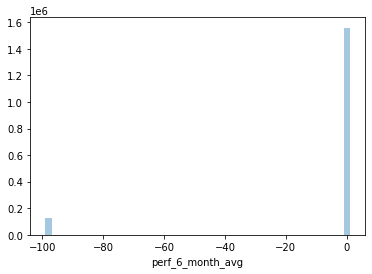

In [15]:
sns.distplot(df['perf_6_month_avg'] , kde = False)

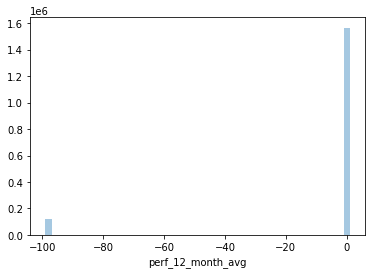

In [16]:
sns.distplot(df['perf_12_month_avg'] , kde = False)

In [17]:
#changing the -99 value in 'perf_6_month_avg','perf_12_month_avg' to NaN since performance cannot be negative
df['perf_6_month_avg'] = df['perf_6_month_avg'].replace(-99.0 , np.NaN)
df['perf_12_month_avg'] = df['perf_12_month_avg'].replace(-99.0 , np.NaN)

In [18]:
df.isnull().sum()

national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg     129478
perf_12_month_avg    122050
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [19]:
#since the rows with missing values is about 5% of the total data. Dropping the rows with null values.
df.dropna(inplace = True)

### Plotting

C:\Users\mural\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


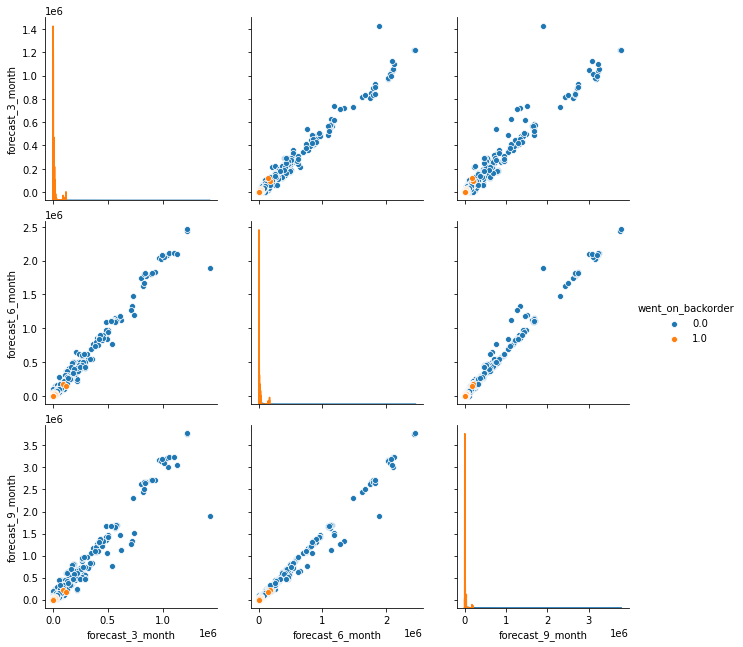

In [20]:
#different distributions of forecasts.
forecasts = ['forecast_3_month','forecast_6_month', 'forecast_9_month']
sns.pairplot(df, hue = 'went_on_backorder', vars = forecasts, size = 3 )

C:\Users\mural\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


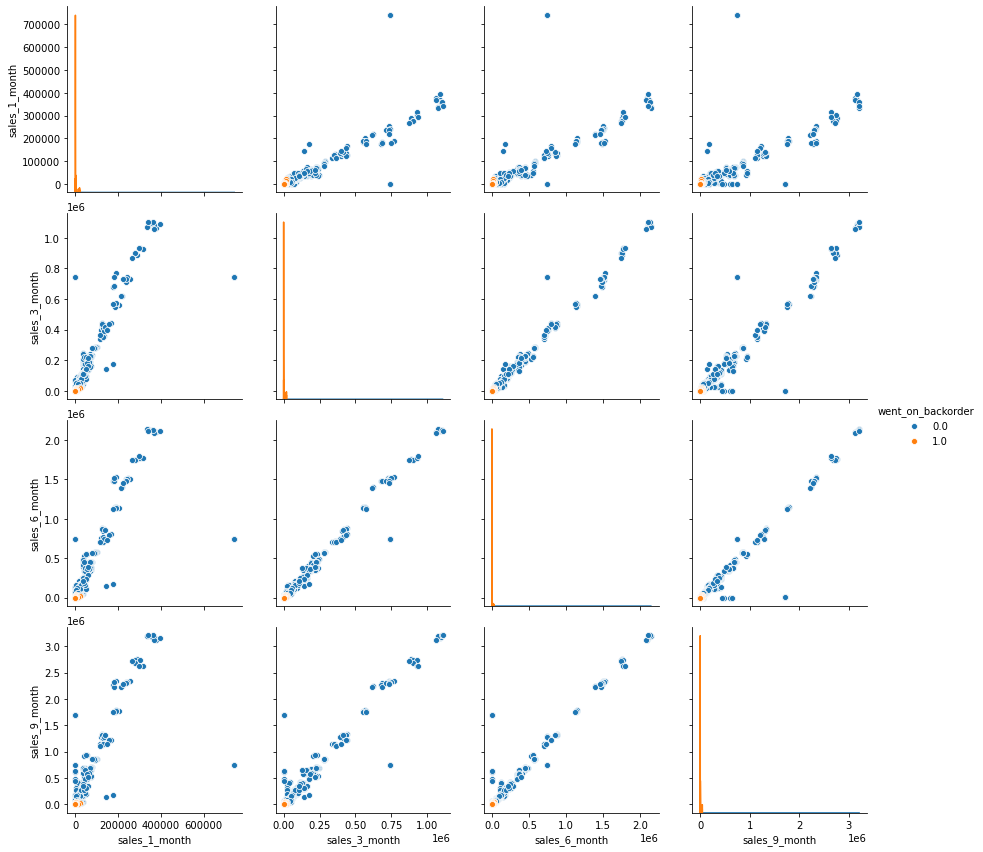

In [21]:
#different distributions of sales features.
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
sns.pairplot(df, vars=sales, hue='went_on_backorder', size=3)
plt.show()

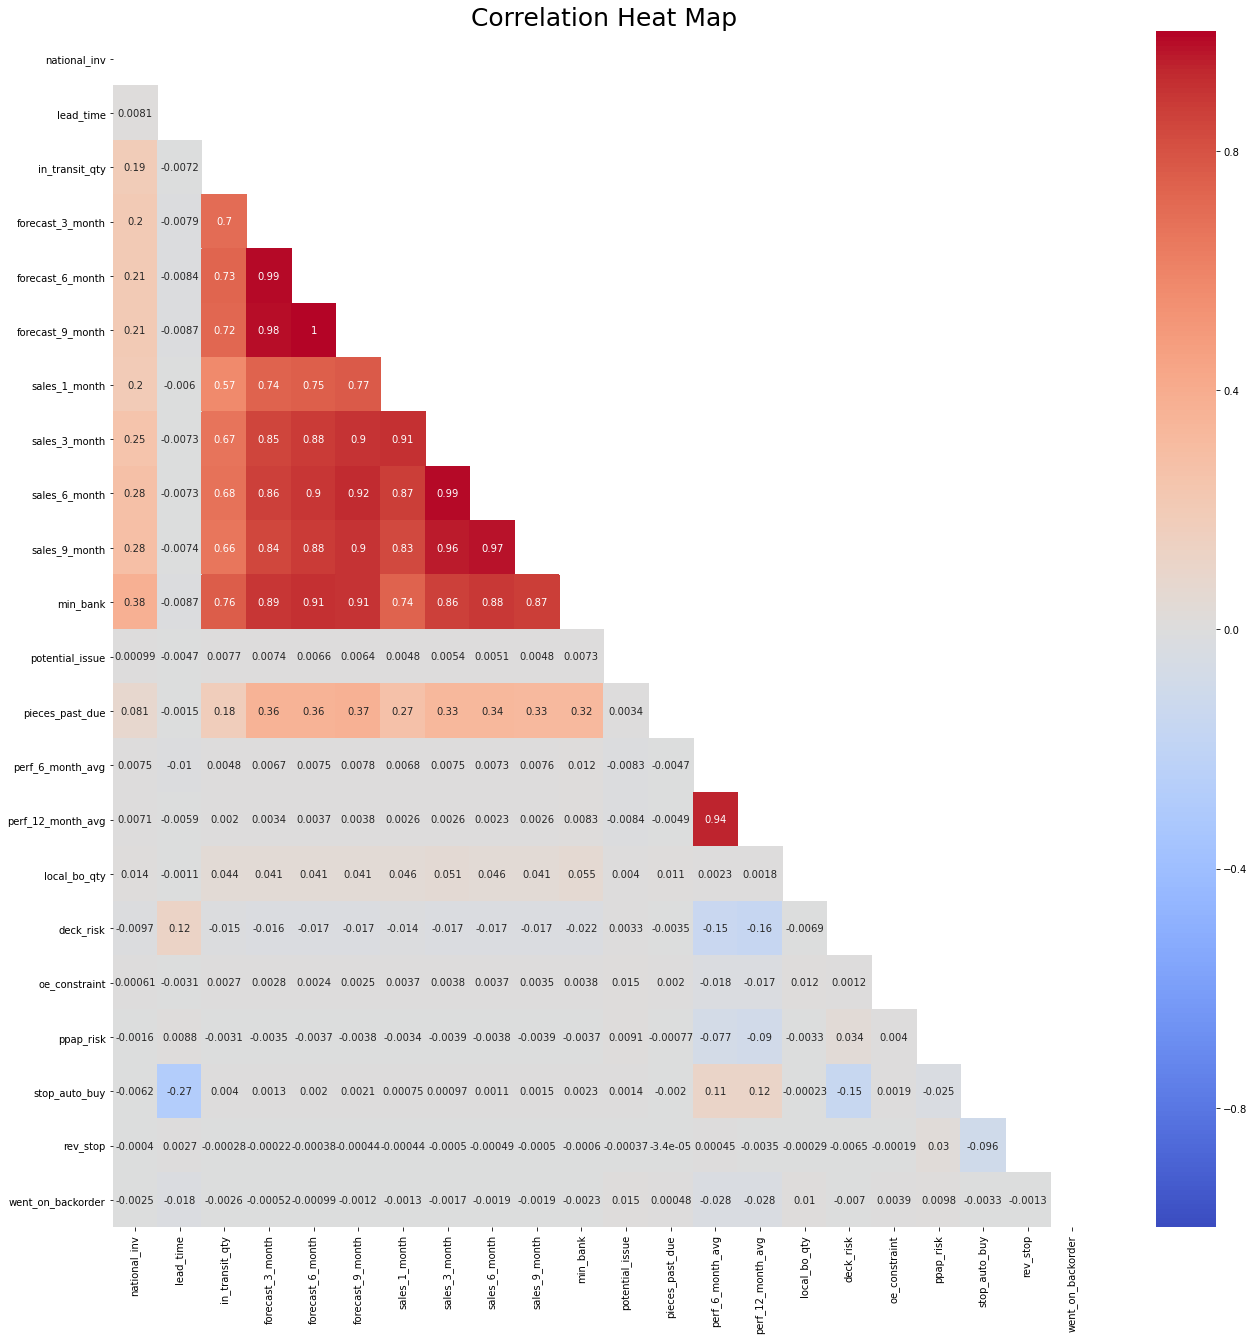

In [22]:
corr_map = df.corr()

#extracting lower triangle of the matrix.
mask = np.zeros_like(corr_map, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#plotting the correlation map
plt.figure(figsize = (22,22))
plt.title('Correlation Heat Map', size = 25)
sns.heatmap(corr_map,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask)
plt.show()

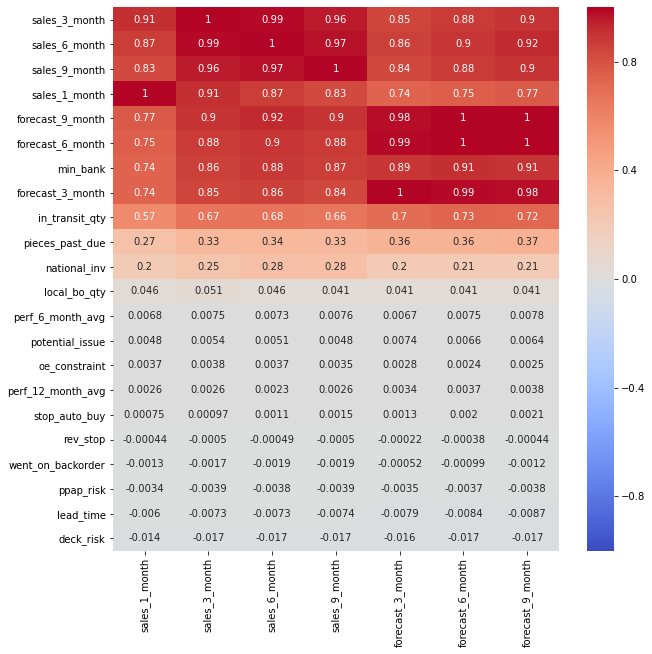

In [23]:
#checking the correlation by sales and forecast features.
plt.figure(figsize=(10,10))
sns.heatmap(corr_map[['sales_1_month','sales_3_month','sales_6_month','sales_9_month','forecast_3_month','forecast_6_month',
                     'forecast_9_month']].sort_values(by=['sales_3_month'],ascending=False),
            vmin=-1,
            vmax = 1,
            cmap='coolwarm',
            annot=True);

### Obsevations

1. 'sales_3_month','sales_6_month','sales_9_month' are highly correlated.
2. 'forecast_3_month','forecast_6_month','forecast_9_month' are highly correlated.
3. 'perf_6_month_avg' and 'perf_12_month_avg' are correlated.
4. 'lead_time' and 'national_inv' are not highly correlated with any of the features.
5. Checking for VIF might give multicollinearity between the features.

In [24]:
# Caluculating VIF.

vif_df = df[df.columns[:-1]]
X = add_constant(vif_df)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)


const                 63.858928
national_inv           1.410070
lead_time              1.091731
in_transit_qty         2.774563
forecast_3_month      94.377762
forecast_6_month     499.613855
forecast_9_month     286.910593
sales_1_month          7.212256
sales_3_month         82.803696
sales_6_month        122.762912
sales_9_month         20.048673
min_bank              10.248674
potential_issue        1.000556
pieces_past_due        1.184070
perf_6_month_avg       9.165914
perf_12_month_avg      9.227503
local_bo_qty           1.006015
deck_risk              1.054906
oe_constraint          1.000771
ppap_risk              1.010370
stop_auto_buy          1.120465
rev_stop               1.011204
dtype: float64

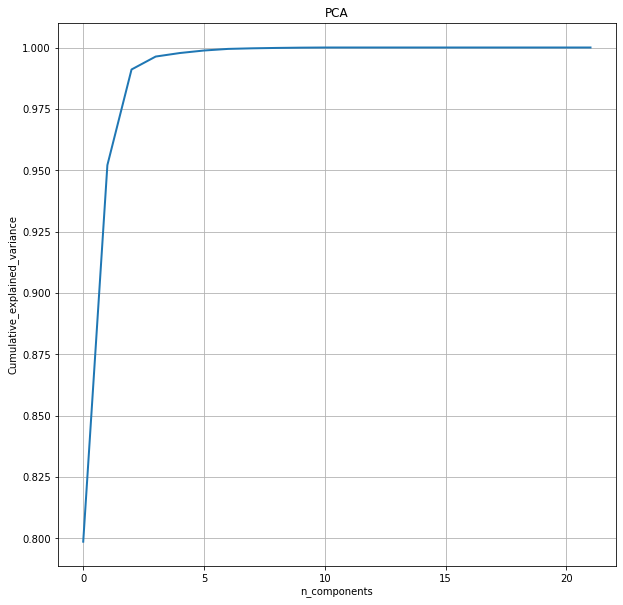

In [25]:
#Principal Component Analysis.
pca = decomposition.PCA()

pca.n_components = 22
pca_data = pca.fit_transform(df)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(10, 10))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.title('PCA')
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


### Observations

1. 'forecast_3_month','forecast_6_month','forecast_9_month','sales_3_month','sales_6_month','sales_9_month' have very high VIF. Dropping these features might improve the prediction accuracy.
2. Almost 99% of the variance in the data can be explained with approx. 5 features of the data.(from PCA)
3. Based on VIF, these features might be 'national_inv', 'lead_time', 'sales_1_month', 'pieces_past_due', 'perf_6_month_avg',
   'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop'
